<font size="5">**Exercise session 5**</font>

**Best-subset selection**

Best subset selection finds for each $k \in \{1, . . . , p\}$ the subset of size $k$ that gives smallest RSS

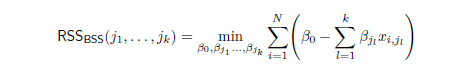

with $j_i \in \{1, . . . , p\}$. There are ${p}\choose{k}$ different subsets to try for a given $k$.

In this lab, we will generate simulated data, and will then use this data to perform best subset selection and forward-stepwise selection.

* Generate a predictor $X$ of length $n$ = 100, as well as a noise vector $\epsilon$ of length $n$ = 100.

In [37]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression,Lasso,LassoCV,RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
np.random.seed(1)

X = np.random.randn(100)
eps = np.random.randn(100)

* Generate a response vector $Y$ of length $n$ = 100 according to the model
$Y = \beta_0 + \beta_{1}X + \beta_{2}X^2 + \beta_{3}X^3 + \epsilon$,
where $\beta_0, \beta_{1}, \beta_{2}$ and $\beta_{3}$ are constants of our choice.

In [39]:
beta = [3,4,2,1]
Y = beta[0] + beta[1]*X + beta[2]*X**2 + beta[3]*X**3 + eps

* Perform best subset selection in order to choose the best model containing the predictors $X, X^2,...,X^{10}$.

In [62]:
poly = PolynomialFeatures(10,include_bias=False)
predictors = poly.fit_transform(pd.DataFrame({'X':X}))
predictors = pd.DataFrame(predictors)
col = ['X' + str(i) for i in range(1,11)]
predictors.columns = col
predictors.head(100)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,1.624345,2.638498,4.285832,6.961671,1.130816e+01,1.836835e+01,2.983655e+01,4.846486e+01,7.872367e+01,1.278744e+02
1,-0.611756,0.374246,-0.228947,0.140060,-8.568260e-02,5.241688e-02,-3.206636e-02,1.961680e-02,-1.200071e-02,7.341509e-03
2,-0.528172,0.278965,-0.147342,0.077822,-4.110322e-02,2.170956e-02,-1.146638e-02,6.056216e-03,-3.198722e-03,1.689475e-03
3,-1.072969,1.151262,-1.235268,1.325403,-1.422116e+00,1.525886e+00,-1.637228e+00,1.756694e+00,-1.884878e+00,2.022415e+00
4,0.865408,0.748930,0.648130,0.560897,4.854043e-01,4.200726e-01,3.635340e-01,3.146051e-01,2.722617e-01,2.356173e-01
...,...,...,...,...,...,...,...,...,...,...
95,0.077340,0.005981,0.000463,0.000036,2.767087e-06,2.140067e-07,1.655129e-08,1.280078e-09,9.900132e-11,7.656768e-12
96,-0.343854,0.118235,-0.040656,0.013980,-4.806936e-03,1.652883e-03,-5.683498e-04,1.954292e-04,-6.719904e-05,2.310664e-05
97,0.043597,0.001901,0.000083,0.000004,1.574983e-07,6.866431e-09,2.993548e-10,1.305093e-11,5.689795e-13,2.480572e-14
98,-0.620001,0.384401,-0.238329,0.147764,-9.161391e-02,5.680070e-02,-3.521648e-02,2.183425e-02,-1.353725e-02,8.393108e-03


In [41]:
def fit_linear_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    X = sm.add_constant(X)
    model = sm.OLS(Y,X).fit()
    return model.ssr,model.rsquared,model
    
from tqdm.notebook import tqdm
from tqdm.notebook import tnrange
from itertools import combinations

def run_subset_selection(X,y):
    
    RSS_list, R_squared_list, feature_list = [],[],[]
    aic_list,bic_list,adj_r_squared_list = [],[],[]
    numb_features = []

    #Looping over k = 1 to k = 11 features in X
    for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):
        best_features = None
        best_RSS = None
        best_r2 = 0
        best_model = None
        
        #Looping over all possible combinations: 
        for combo in combinations(X.columns,k):
            tmp_result = fit_linear_reg(X[list(combo)],Y)   #Store temp result  
            r2 = tmp_result[1]
            if r2 > best_r2:
                best_features = combo
                best_RSS = tmp_result[0]
                best_r2 = tmp_result[1]
                best_model = tmp_result[2]
                
        RSS_list.append(best_RSS)
        R_squared_list.append(best_r2)
        feature_list.append(best_features)
        numb_features.append(len(best_features))
        aic_list.append(best_model.aic)
        bic_list.append(best_model.bic)
        adj_r_squared_list.append(best_model.rsquared_adj)
        
    df = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,
                      'AIC':aic_list,'BIC':bic_list,'adj_r2':adj_r_squared_list,'features':feature_list})
    return df

In [42]:
best_subset_results = run_subset_selection(predictors,Y)

Loop...:   0%|          | 0/10 [00:00<?, ?it/s]

In [43]:
best_subset_results

,numb_features,RSS,R_squared,AIC,BIC,adj_r2,features
0,1,771.612854,0.819633,492.118982,497.329322,0.817793,"(X1,)"
1,2,329.558323,0.922965,409.046022,416.861533,0.921376,"(X1, X2)"
2,3,84.811563,0.980175,275.313877,285.734557,0.979556,"(X1, X2, X3)"
3,4,79.800246,0.981346,271.223347,284.249198,0.980561,"(X1, X2, X3, X6)"
4,5,79.446732,0.981429,272.779363,288.410385,0.980441,"(X1, X2, X3, X8, X10)"
5,6,77.901340,0.981790,272.815004,291.051195,0.980616,"(X1, X2, X5, X7, X8, X9)"
6,7,77.535196,0.981876,274.343886,295.185248,0.980497,"(X1, X2, X3, X5, X7, X9, X10)"
7,8,77.090698,0.981980,275.768950,299.215482,0.980396,"(X1, X2, X3, X4, X5, X6, X7, X9)"
8,9,76.794677,0.982049,277.384221,303.435923,0.980254,"(X1, X2, X4, X5, X6, X7, X8, X9, X10)"
9,10,76.498124,0.982118,278.997310,307.654182,0.980109,"(X1, X2, X3, X4, X5, X6, X7, X8, X9, X10)"


In [44]:
print('The best model according to adjR2 is model having features - ',
      best_subset_results.sort_values('adj_r2',ascending=False)['numb_features'].values[0],
     )
print('The best model according to AIC is model having features - ',
      best_subset_results.sort_values('AIC',ascending=True)['numb_features'].values[0])
print('The best model according to BIC is model having features - ',
      best_subset_results.sort_values('BIC',ascending=True)['numb_features'].values[0])

The best model according to adjR2 is model having features -  6
The best model according to AIC is model having features -  4
The best model according to BIC is model having features -  4


We can see that using different metrics can give us different outcomes, we will observe is that 
AIC and BIC will give us similar results.

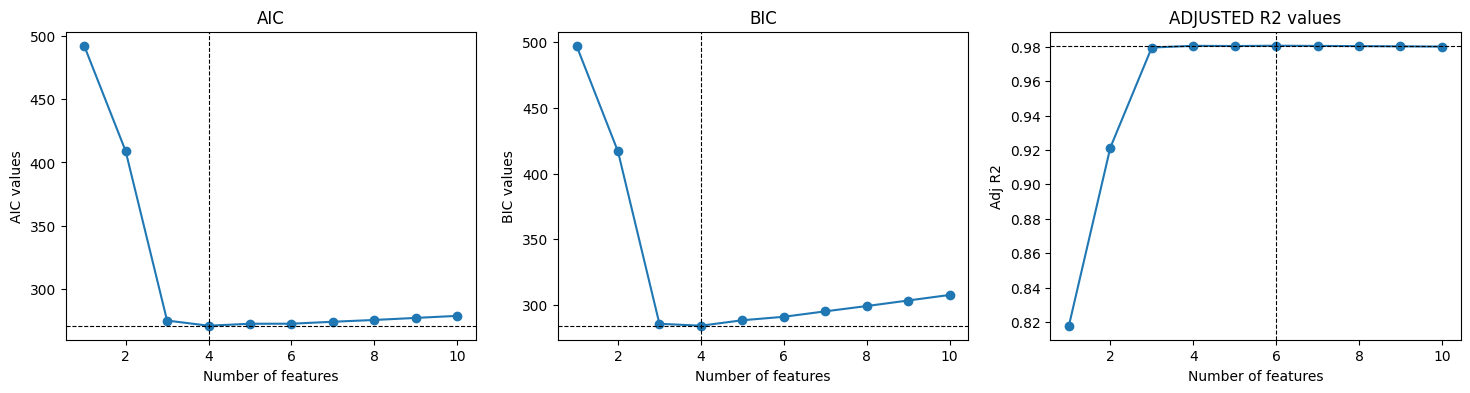

In [45]:
def plot_results(df):
    fig,(a1,a2,a3) = plt.subplots(1,3,figsize = (18,4))
    a1.plot(df['numb_features'],df['AIC'],marker = 'o')
    a1.axhline(y = min(df['AIC']),linestyle = 'dashed',linewidth = 0.8,color = 'black')
    a1.axvline(x =  df.sort_values('AIC',ascending=True)['numb_features'].values[0],color = 'black',
               linestyle = 'dashed',linewidth = 0.8)
    a1.set_title('AIC')
    a1.set_xlabel('Number of features')
    a1.set_ylabel('AIC values')

    a2.plot(df['numb_features'],df['BIC'],marker = 'o')
    a2.axhline(y = min(df['BIC']),linestyle = 'dashed',linewidth = 0.8,color = 'black')
    a2.axvline(x =  df.sort_values('BIC',ascending=True)['numb_features'].values[0],color = 'black',
               linestyle = 'dashed',linewidth = 0.8)
    a2.set_title('BIC')
    a2.set_xlabel('Number of features')
    a2.set_ylabel('BIC values')

    a3.plot(df['numb_features'],df['adj_r2'],marker=  'o')
    a3.axhline(y = max(df['adj_r2']),linestyle = 'dashed',linewidth = 0.8,color = 'black')
    a3.axvline(x =  df.sort_values('adj_r2',ascending=False)['numb_features'].values[0],color = 'black',
               linestyle = 'dashed',linewidth = 0.8)
    a3.set_title('ADJUSTED R2 values')
    a3.set_xlabel('Number of features')
    a3.set_ylabel('Adj R2')
    
plot_results(best_subset_results)

In [46]:
print('Features choosen by AIC ',list(best_subset_results['features'][3]))
print('Features choosen by BIC ',list(best_subset_results['features'][3]))
print('Features choosen by adj_r2 ',list(best_subset_results['features'][6]))

Features choosen by AIC  ['X1', 'X2', 'X3', 'X6']
Features choosen by BIC  ['X1', 'X2', 'X3', 'X6']
Features choosen by adj_r2  ['X1', 'X2', 'X3', 'X5', 'X7', 'X9', 'X10']


**Forward-stepwise selection**

Instead of searching all possible subsets (infeasible for large $p$) we can take a greedy approach.
Forward-stepwise selection starts with the intercept, and then sequentially adds into the model the predictor
that most improves the fit.

Forward-stepwise may be suboptimal compared to the best subset selection but may be preferred due to its computational feasibility.

In [47]:
def forward_stepwise_selection(data,target):
    total_features = [[]]
    list_r2 = []
    list_adj_r2 = []
    list_aic,list_bic = [],[]
    len_features = []
    remaining_features = [col for col in data.columns if not col == target]
    
    
    for i in range(1,len(data.columns)):
        best_score = 0;best_feature = None
        best_model = None
        for feature in remaining_features:

            X = total_features[i-1] + [feature]
            model = sm.OLS(data[target],sm.add_constant(data[X])).fit()
            score = model.rsquared

            if score > best_score:
                best_score = score
                best_feature = feature
                best_model = model
                
        total_features.append(total_features[i-1] + [best_feature])
        remaining_features.remove(best_feature)
        list_r2.append(best_model.rsquared)
        list_adj_r2.append(best_model.rsquared_adj)
        list_aic.append(best_model.aic)
        list_bic.append(best_model.bic)
        len_features.append(len(total_features[-1]))
        
    return pd.DataFrame({'numb_features': len_features, 'R_squared':list_r2,
                      'AIC':list_aic,'BIC':list_bic,'adj_r2':list_adj_r2,'features':total_features[1:]})

In [59]:
data = pd.concat([predictors,pd.DataFrame(Y,columns = ['Y'])],axis = 1)
data.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y
0,1.624345,2.638498,4.285832,6.961671,11.308158,18.368354,29.836551,48.464863,78.723675,1.278744e+02,59.772223
1,-0.611756,0.374246,-0.228947,0.140060,-0.085683,0.052417,-0.032066,0.019617,-0.012001,7.341509e-03,1.259873
2,-0.528172,0.278965,-0.147342,0.077822,-0.041103,0.021710,-0.011466,0.006056,-0.003199,1.689475e-03,-0.085238
3,-1.072969,1.151262,-1.235268,1.325403,-1.422116,1.525886,-1.637228,1.756694,-1.884878,2.022415e+00,-0.819578
4,0.865408,0.748930,0.648130,0.560897,0.485404,0.420073,0.363534,0.314605,0.272262,2.356173e-01,-0.104884
5,-2.301539,5.297080,-12.191435,28.059060,-64.579013,148.631099,-342.080225,787.310875,-1812.026445,4.170449e+03,-685.421138
6,1.744812,3.044368,5.311849,9.268177,16.171224,28.215743,49.231160,85.899106,149.877771,2.615085e+02,97.311598
7,-0.761207,0.579436,-0.441071,0.335746,-0.255572,0.194543,-0.148088,0.112725,-0.085807,6.531714e-02,-0.686731
8,0.319039,0.101786,0.032474,0.010360,0.003305,0.001055,0.000336,0.000107,0.000034,1.092544e-05,-0.618443
9,-0.249370,0.062186,-0.015507,0.003867,-0.000964,0.000240,-0.000060,0.000015,-0.000004,9.299264e-07,2.455959


In [49]:
result_fwd = forward_stepwise_selection(data,'Y')

In [50]:
result_fwd

,numb_features,R_squared,AIC,BIC,adj_r2,features
0,1,0.819633,492.118982,497.329322,0.817793,[X1]
1,2,0.922965,409.046022,416.861533,0.921376,"[X1, X2]"
2,3,0.980175,275.313877,285.734557,0.979556,"[X1, X2, X3]"
3,4,0.981346,271.223347,284.249198,0.980561,"[X1, X2, X3, X6]"
4,5,0.981413,272.863273,288.494294,0.980425,"[X1, X2, X3, X6, X10]"
5,6,0.981497,274.414314,292.650506,0.980303,"[X1, X2, X3, X6, X10, X4]"
6,7,0.981718,275.210066,296.051427,0.980327,"[X1, X2, X3, X6, X10, X4, X8]"
7,8,0.981722,277.190336,300.636868,0.980115,"[X1, X2, X3, X6, X10, X4, X8, X9]"
8,9,0.981743,279.076446,305.128148,0.979917,"[X1, X2, X3, X6, X10, X4, X8, X9, X7]"
9,10,0.982118,278.997310,307.654182,0.980109,"[X1, X2, X3, X6, X10, X4, X8, X9, X7, X5]"


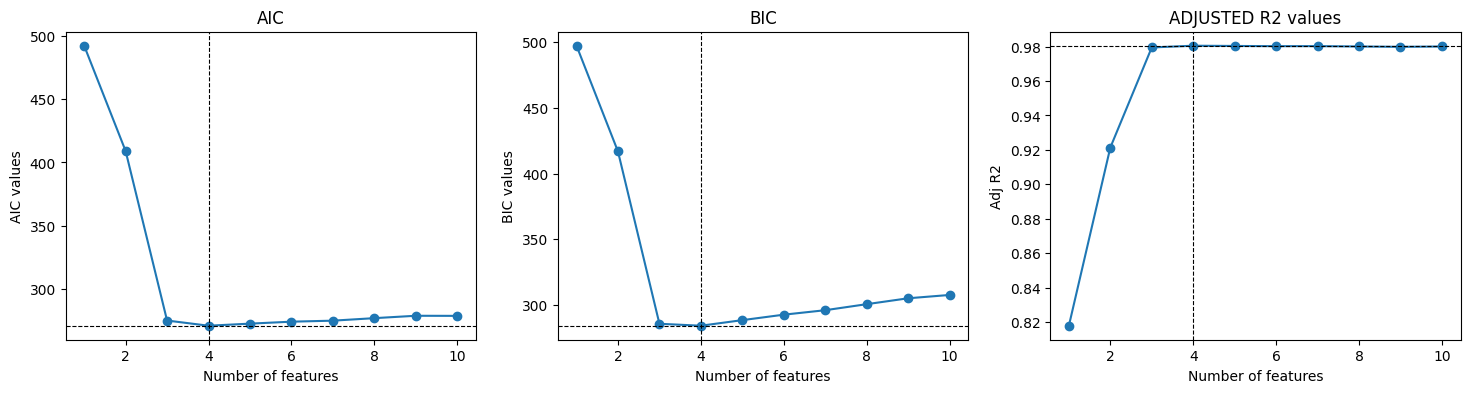

In [51]:
plot_results(result_fwd)

In this case, best model is the one with 4 features, for all the three metrics

* Now we will try to generate a response vector $Y$ according to the model, 

$Y = \beta_0 + \beta_{7}X^7 + \epsilon$ 

and perform best subset selection. 


In [52]:
X.shape

(100,)

In [53]:
beta = [0.5,2]
Y =  beta[0] + beta[1]*X**7 + np.random.randn(100)

In [54]:
predictors.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,1.624345,2.638498,4.285832,6.961671,11.308158,18.368354,29.836551,48.464863,78.723675,127.874436
1,-0.611756,0.374246,-0.228947,0.140060,-0.085683,0.052417,-0.032066,0.019617,-0.012001,0.007342
2,-0.528172,0.278965,-0.147342,0.077822,-0.041103,0.021710,-0.011466,0.006056,-0.003199,0.001689
3,-1.072969,1.151262,-1.235268,1.325403,-1.422116,1.525886,-1.637228,1.756694,-1.884878,2.022415
4,0.865408,0.748930,0.648130,0.560897,0.485404,0.420073,0.363534,0.314605,0.272262,0.235617


In [55]:
result_subset = run_subset_selection(predictors,Y)

Loop...:   0%|          | 0/10 [00:00<?, ?it/s]

In [56]:
result_subset.head()

,numb_features,RSS,R_squared,AIC,BIC,adj_r2,features
0,1,99.062202,0.999904,286.845484,292.055824,0.999903,"(X7,)"
1,2,91.425055,0.999911,280.822645,288.638155,0.999910,"(X2, X7)"
2,3,89.461150,0.999913,280.651133,291.071814,0.999911,"(X4, X7, X8)"
3,4,87.037269,0.999916,279.904328,292.930179,0.999912,"(X6, X7, X9, X10)"
4,5,86.457829,0.999916,281.236364,296.867386,0.999912,"(X2, X4, X6, X7, X9)"


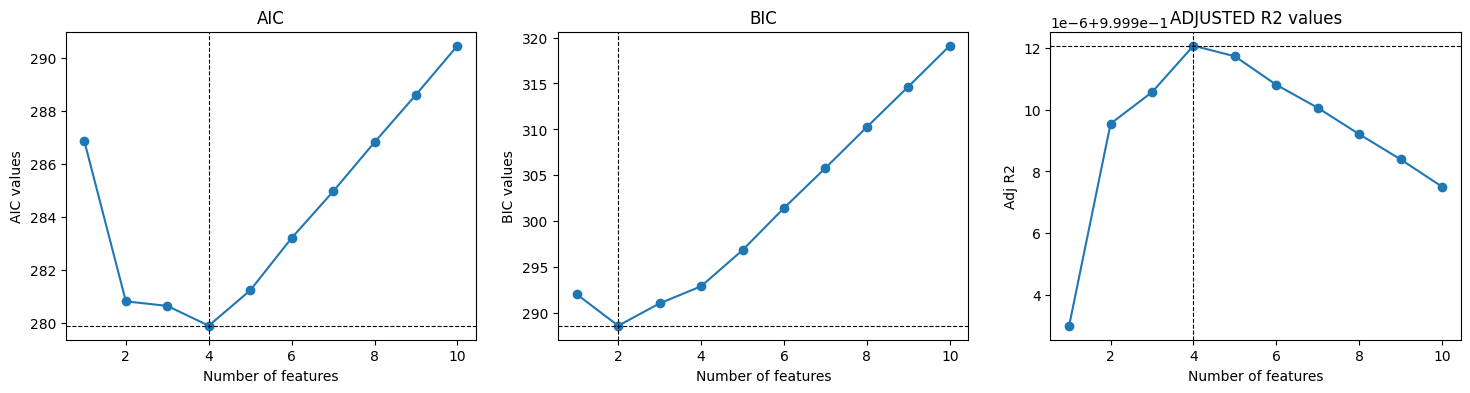

In [57]:
plot_results(result_subset)